In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Función polinómica de grado 3: 2 * x**3 - 3 * x**2 + 5 * x + 3
def polynomial_function(x):
    return np.polyval([2, -3, 5, 3], x)

# Derivada de la función polinómica
def gradient(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

In [3]:
# Descenso de gradiente estocástico
def stochastic_gradient_descent(learning_rate, epochs):
    coefficients = np.random.uniform(-5, 5, 4)  # Initialize coefficients randomly
    x_values = np.linspace(-5, 5, 100)
    for epoch in range(epochs):
        gradient_value = gradient(x_values)
        for i in range(len(coefficients)):
            coefficients[i] = coefficients[i] - learning_rate * np.sum(gradient_value * x_values**i)
    return coefficients

# Descenso de gradiente
def gradient_descent(learning_rate, epochs):
    coefficients = np.random.uniform(-5, 5, 4)  # Initialize coefficients randomly
    x_values = np.linspace(-5, 5, 100)
    for epoch in range(epochs):
        gradient_value = gradient(x_values)
        for i in range(len(coefficients)):
            coefficients[i] = coefficients[i] - learning_rate * np.sum(gradient_value * x_values**i)
    return coefficients

# Descenso de gradiente por mini lotes
def mini_batch_gradient_descent(learning_rate, epochs, batch_size):
    coefficients = np.random.uniform(-5, 5, 4)  # Initialize coefficients randomly
    x_values = np.linspace(-5, 5, 100)
    for epoch in range(epochs):
        batch_indices = np.random.choice(len(x_values), size=batch_size, replace=False)
        batch = x_values[batch_indices]
        gradient_value = gradient(batch)
        for i in range(len(coefficients)):
            coefficients[i] = coefficients[i] - learning_rate * np.sum(gradient_value * batch**i)
    return coefficients

In [4]:
# Función para calcular el fitness numéricamente
def calculate_fitness(coefficients, x_values, y_true):
    y_predicted = np.polyval(coefficients, x_values)
    return np.sum((y_predicted - y_true)**2)

In [5]:
# Datos de entrada
x_values = np.linspace(-5, 5, 100)
y_true = polynomial_function(x_values)

iterations = int(len(x_values)*0.8)


In [6]:
# Datos de entrada
x_values = np.linspace(-5, 5, 100)
y_true = polynomial_function(x_values)
iterations = int(len(x_values)*0.8)


In [7]:
# Descenso de gradiente estocástico
start_time = time.time()
coefficients_sgd = stochastic_gradient_descent(learning_rate=0.01, epochs=iterations)
sgd_time = time.time() - start_time
fitness_sgd = calculate_fitness(coefficients_sgd, x_values, y_true)

# Descenso de gradiente
start_time = time.time()
coefficients_gd = gradient_descent(learning_rate=0.01, epochs=iterations)
gd_time = time.time() - start_time
fitness_gd = calculate_fitness(coefficients_gd, x_values, y_true)

# Descenso de gradiente por mini lotes
start_time = time.time()
coefficients_mbgd = mini_batch_gradient_descent(learning_rate=0.01, epochs=iterations, batch_size=10)
mbgd_time = time.time() - start_time
fitness_mbgd = calculate_fitness(coefficients_mbgd, x_values, y_true)

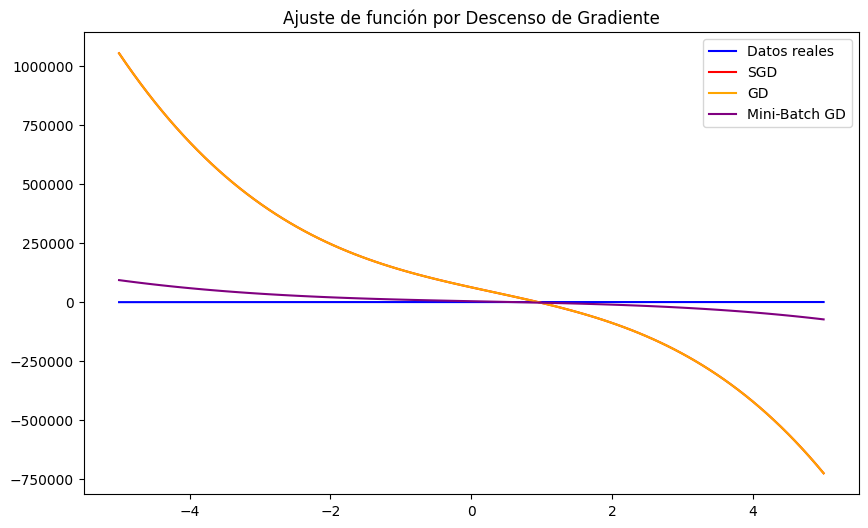

In [8]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_true, label='Datos reales', color='blue')
plt.plot(x_values, np.polyval(coefficients_sgd, x_values), label='SGD', color='red')
plt.plot(x_values, np.polyval(coefficients_gd, x_values), label='GD', color='orange')
plt.plot(x_values, np.polyval(coefficients_mbgd, x_values), label='Mini-Batch GD', color='purple')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Ajuste de función por Descenso de Gradiente')
plt.legend()
plt.show()

In [9]:
# Mostrar resultados numéricos de tiempo y fitness
print(f'Tiempo de ejecución SGD: {sgd_time} segundos')
print(f'Tiempo de ejecución GD: {gd_time} segundos')
print(f'Tiempo de ejecución Mini-Batch GD: {mbgd_time} segundos')

print(f'Fitness SGD: {fitness_sgd}')
print(f'Fitness GD: {fitness_gd}')
print(f'Fitness Mini-Batch GD: {fitness_mbgd}')

Tiempo de ejecución SGD: 0.004923582077026367 segundos
Tiempo de ejecución GD: 0.003942251205444336 segundos
Tiempo de ejecución Mini-Batch GD: 0.005902767181396484 segundos
Fitness SGD: 17183261090671.693
Fitness GD: 17183195297411.607
Fitness Mini-Batch GD: 145210852046.1087
